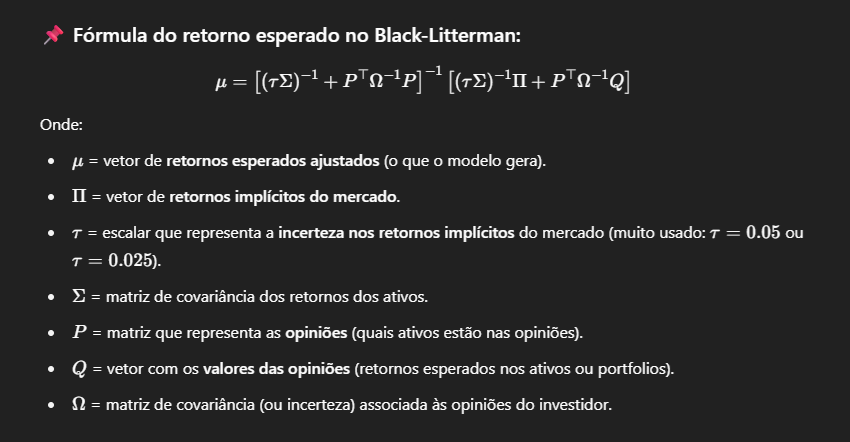

# Biibliotecas

In [ ]:
!pip install yfinance

In [ ]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
#Grab Data
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Use PyPortfolioOpt for Calculations
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import DiscreteAllocation

# Tratamento dos Dados

In [ ]:
#Create a Portfolio
symbols = [
    'AAPL',
    'MSFT',
    'META',
    'AMZN',
    'XOM',
    'UNH',
    'JNJ',
    'V',
    'HD',
    'ABBV',
    'KO',
    'DIS',
    'T',
    'UPS',
    'LMT',
    'CAT',
    'F',
    'MAR',
    'O',
    'HSY'
]

#Get the stock data
portfolio = yf.download(symbols, start="2018-01-01", end="2023-02-28")['Close']

#SP500 ETF Benchmark
market_prices = yf.download("SPY", start='2018-01-01', end='2023-02-28')["Close"]
portfolio.head()

/tmp/ipython-input-9-353121800.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  portfolio = yf.download(symbols, start="2018-01-01", end="2023-02-28")['Close']
[*********************100%***********************]  20 of 20 completed
/tmp/ipython-input-9-353121800.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_prices = yf.download("SPY", start='2018-01-01', end='2023-02-28')["Close"]
[*********************100%***********************]  1 of 1 completed


Ticker           AAPL       ABBV       AMZN         CAT         DIS         F  \
Date                                                                            
2018-01-02  40.426823  70.405563  59.450500  132.714859  106.943237  8.470928   
2018-01-03  40.419785  71.507317  60.209999  132.917725  107.402374  8.537841   
2018-01-04  40.607533  71.099510  60.479500  134.743118  107.354553  8.685043   
2018-01-05  41.069855  72.337219  61.457001  136.872787  106.771049  8.832247   
2018-01-08  40.917320  71.178207  62.343498  140.312332  105.240562  8.798792   

Ticker              HD        HSY         JNJ         KO         LMT  \
Date                                                                   
2018-01-02  156.706467  94.098320  112.882538  36.016136  261.119049   
2018-01-03  157.523224  93.703812  113.960846  35.937054  263.307800   
2018-01-04  158.773285  94.358513  113.952759  36.443218  267.824371   
2018-01-05  160.431793  94.811775  114.893242  36.435295  270.250854   
2018-01-08  160.048462  95.735031  115.039207  36.379929  269.004852   

Ticker             MAR        META       MSFT          O          T  \
Date                                                                  
2018-01-02  125.755806  180.430161  79.328514  38.461250  16.451574   
2018-01-03  128.294403  183.662430  79.697723  38.359348  16.071659   
2018-01-04  127.589279  183.324280  80.399178  37.530636  16.221064   
2018-01-05  126.366966  185.830536  81.395950  37.503456  16.280827   
2018-01-08  128.191025  187.252731  81.478989  37.551006  16.327780   

Ticker             UNH        UPS           V        XOM  
Date                                                      
2018-01-02  197.135864  94.427780  108.740433  60.040230  
2018-01-03  199.203873  96.519943  109.822998  61.219418  
2018-01-04  200.068481  97.146019  110.231323  61.304161  
2018-01-05  203.883591  97.443802  112.871231  61.254719  
2018-01-08  200.344772  98.627281  113.327080  61.530098

In [ ]:
portfolio.head()

Ticker           AAPL       ABBV       AMZN         CAT         DIS         F  \
Date                                                                            
2018-01-02  40.426823  71.013657  59.450500  132.714798  106.943237  8.470929   
2018-01-03  40.419781  72.124924  60.209999  132.917648  107.402382  8.537841   
2018-01-04  40.607536  71.713600  60.479500  134.743103  107.354553  8.685043   
2018-01-05  41.069855  72.961998  61.457001  136.872711  106.771057  8.832248   
2018-01-08  40.917324  71.792976  62.343498  140.312271  105.240555  8.798792   

Ticker              HD        HSY         JNJ         KO         LMT  \
Date                                                                   
2018-01-02  156.706451  94.098320  112.882530  36.016136  261.119019   
2018-01-03  157.523224  93.703827  113.960884  35.937054  263.307709   
2018-01-04  158.773315  94.358505  113.952759  36.443211  267.824402   
2018-01-05  160.431824  94.811752  114.893250  36.435291  270.250854   
2018-01-08  160.048462  95.735039  115.039162  36.379940  269.004852   

Ticker             MAR        META       MSFT          O          T  \
Date                                                                  
2018-01-02  125.755859  180.430145  79.328514  38.461250  16.451571   
2018-01-03  128.294464  183.662399  79.697716  38.359356  16.071661   
2018-01-04  127.589279  183.324280  80.399155  37.530621  16.221062   
2018-01-05  126.366966  185.830521  81.395966  37.503456  16.280823   
2018-01-08  128.191055  187.252716  81.479019  37.550995  16.327780   

Ticker             UNH        UPS           V        XOM  
Date                                                      
2018-01-02  197.135880  94.427818  108.740440  60.040234  
2018-01-03  199.203827  96.519920  109.823013  61.219395  
2018-01-04  200.068466  97.146027  110.231331  61.304127  
2018-01-05  203.883514  97.443825  112.871284  61.254711  
2018-01-08  200.344803  98.627319  113.327072  61.530087

In [ ]:
market_prices.head()

Ticker             SPY
Date                  
2018-01-02  238.568710
2018-01-03  240.077698
2018-01-04  241.089630
2018-01-05  242.696243
2018-01-08  243.140091

In [ ]:
#Grap Market Capitalization for each stock in portfolio
mcaps = {}
for t in symbols:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'AAPL': 3142807453696,
 'MSFT': 3741539893248,
 'META': 1808344023040,
 'AMZN': 2398881841152,
 'XOM': 490221568000,
 'UNH': 271950135296,
 'JNJ': 377151488000,
 'V': 678587269120,
 'HD': 367212986368,
 'ABBV': 335183937536,
 'KO': 298501111808,
 'DIS': 214201909248,
 'T': 194029699072,
 'UPS': 84756013056,
 'LMT': 110701338624,
 'CAT': 190797381632,
 'F': 47241412608,
 'MAR': 76708683776,
 'O': 52550225920,
 'HSY': 33358747648}

# Obtendo a priori

In [ ]:
#Calculate Sigma and Delta to get implied market returns
#Ledoit-Wolf is a particular form of shrinkage, where the shrinkage coefficient is computed using O?

# Essa linha está calculando a matriz de covariância ajustada dos retornos dos ativos na carteira,
# usando o método de Ledoit-Wolf, uma técnica de shrinkage que melhora a estimativa da matriz de covariância,
# especialmente quando o número de ativos é alto e o número de observações é relativamente baixo.
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()

In [ ]:
# Essa linha está calculando o coeficiente de aversão ao risco implícito do mercado (delta), com base nos preços de mercado dos ativos.
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

np.float64(2.5268891421698676)

<Axes: xlabel='Ticker', ylabel='Ticker'>

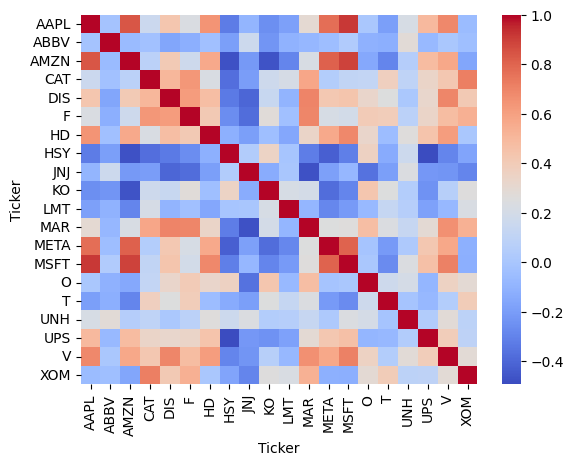

In [ ]:
#Visualize the Covariant Correlation
sns.heatmap(S.corr(), cmap='coolwarm')

In [ ]:
# retorna matriz de Retornos Esperados Implicitos de Mercado
# são os retornos esperados de cada ativo  conforme o que o mercado “espera”, de forma implícita, segundo o equilíbrio de preços atual.
# ou seja o que o mercado espera de retorno de acordo como o Risco ssumido
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

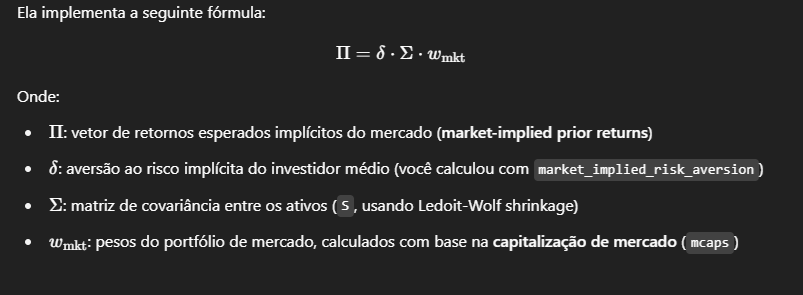

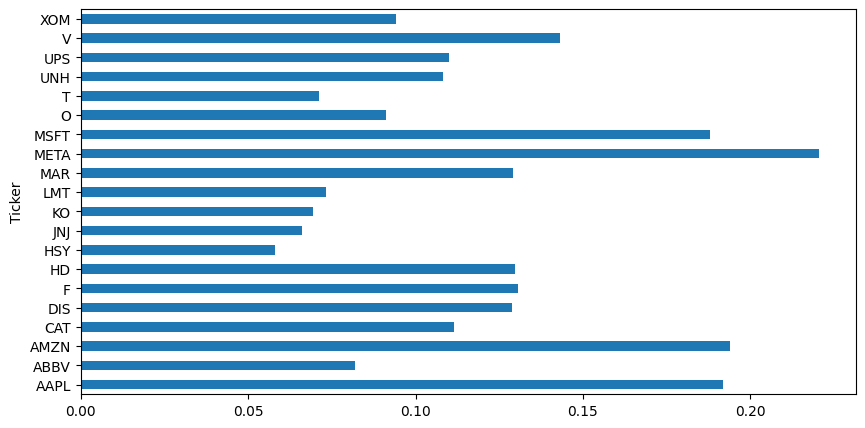

In [ ]:
#What am I looking at here?
market_prior.plot.barh(figsize=(10,5));

# Integrar view

Agora entrará a subjetividade

In [ ]:
#You don't have to provide views on all the assets
viewdict = {
    'AAPL':0.10,
    'MSFT':0.10,
    'META':0.05,
    'AMZN':0.30,
    'XOM':0.02,
    'UNH':0.01,
    'JNJ':0.15,
    'V':0.09,
    'HD':0.16,
    'ABBV':0.07,
    'KO':0.01,
    'DIS':-0.23,
    'T':0.16,
    'UPS':0.10,
    'LMT':-0.09,
    'CAT':0.30,
    'F':0.16,
    'MAR':-0.08,
    'O':0.30,
    'HSY':-0.26
}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

### Intervalos de Confiança

Podemos calcular diretamente a matriz de incerteza especificando intervalos de confiança de 1 desvio padrão, ou seja, limites que acreditamos conter o retorno verdadeiro em 68% das vezes. Isso pode ser mais fácil do que estimar níveis de confiança percentuais um tanto arbitrários."

In [ ]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3),
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3),
]

In [ ]:
variances = []

# Aqui, você assume que cada intervalo [lb,ub] representa um intervalo de 1 desvio padrão (≈68% de confiança).
# Ao elevar ao quadrado, você obtém a variância de cada view.
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)

#Essa é a matriz omega que representa a incerteza associada a cada view.
# Como as views são independentes entre si, a matriz é diagonal.
omega = np.diag(variances)

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225, 0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225]


# Calculo dos Retornos Estimados Posteriores

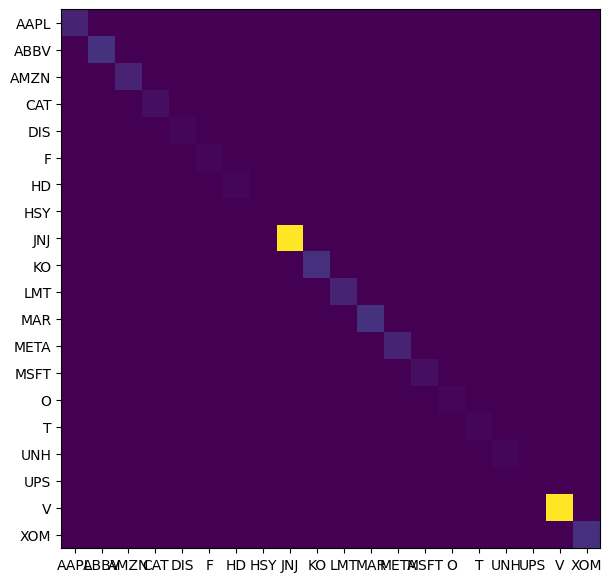

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [ ]:
# We are using the shortcut to automatically compute market-implied prior
'''
S: matriz de covariância dos retornos dos ativos (usualmente obtida com shrinkage).

pi="market": instrui o modelo a calcular os retornos a priori (Π) com base nos pesos de mercado, usando market_caps e risk_aversion.

market_caps: dicionário {ticker: marketCap}, usado para calcular os pesos de mercado 𝑤-mkt
​
risk_aversion: valor escalar (delta) representando a aversão ao risco do investidor médio.

absolute_views: suas opiniões absolutas (ex.: "acho que o retorno de PETR4 será 8%").

omega: matriz de incerteza associada a cada view. Cada diagonal representa a variância de uma view.
'''

bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,  absolute_views=viewdict, omega=omega)

ret_bl = bl.bl_returns()


In [ ]:
# Compara Retornos Esperados Implicitos de Mercado com o gerado no Modelo BL, e a subjetividade
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

Prior  Posterior  Views
AAPL  0.191957   0.151648   0.10
ABBV  0.082061   0.063911   0.07
AMZN  0.193955   0.210506   0.30
CAT   0.111510   0.186362   0.30
DIS   0.128701   0.047974  -0.23
F     0.130531   0.129531   0.16
HD    0.129725   0.099604   0.16
HSY   0.057931   0.009635  -0.26
JNJ   0.066188   0.083357   0.15
KO    0.069366   0.032259   0.01
LMT   0.073374  -0.008207  -0.09
MAR   0.129228  -0.064581  -0.08
META  0.220406   0.159741   0.05
MSFT  0.187818   0.152246   0.10
O     0.091108   0.004509   0.30
T     0.071259   0.060507   0.16
UNH   0.108088   0.042215   0.01
UPS   0.110014   0.102939   0.10
V     0.143060   0.087560   0.09
XOM   0.094082   0.042023   0.02

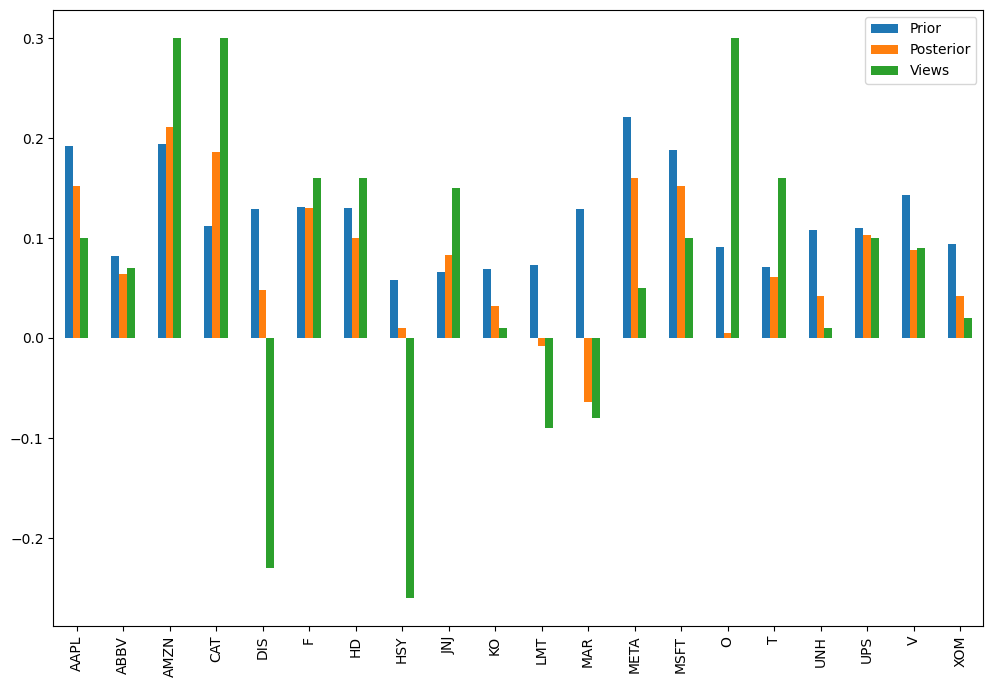

In [ ]:
rets_df.plot.bar(figsize=(12,8));

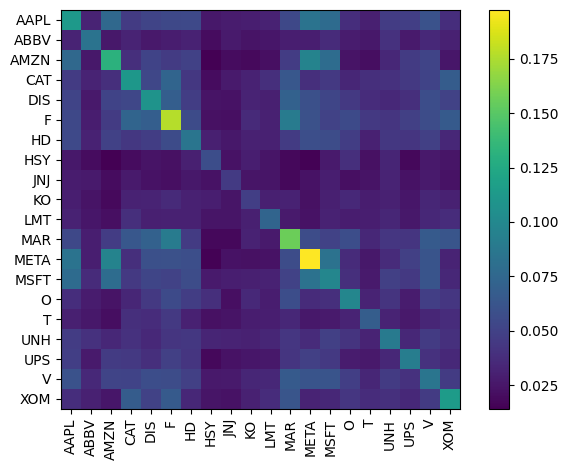

In [ ]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

# Portfolio Allocation

In [ ]:
# utiliza a biblioteca PyPortfolioOpt para construir uma carteira eficiente com base no modelo de Markowitz,
# aplicando uma regularização L2 e maximizando o índice de Sharpe.
ef = EfficientFrontier(ret_bl, S_bl)

# Adiciona a regularização L2 como objetivo adicional.
# Isso penaliza carteiras com pesos extremos (muito altos ou muito baixos), incentivando diversificação.
# Útil quando se quer evitar overfitting na otimização dos pesos, especialmente com muitos ativos.
ef.add_objective(objective_functions.L2_reg)

# Otimiza a carteira para maximizar o índice de Sharpe.
# O índice de Sharpe mede o retorno em excesso por unidade de risco (volatilidade), assumindo uma taxa livre de risco (padrão é 0, mas pode ser configurada).
ef.max_sharpe()

# Recupera os pesos otimizados da carteira.
# clean_weights() arredonda pequenos valores a zero para facilitar a leitura/interpretação (por exemplo, 1.2e-06 vira 0.0).
weights = ef.clean_weights()
weights

/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.09929),
             ('ABBV', 0.03664),
             ('AMZN', 0.15988),
             ('CAT', 0.14691),
             ('DIS', 0.00199),
             ('F', 0.07771),
             ('HD', 0.05744),
             ('HSY', 0.0),
             ('JNJ', 0.06357),
             ('KO', 0.00723),
             ('LMT', 0.0),
             ('MAR', 0.0),
             ('META', 0.09716),
             ('MSFT', 0.10129),
             ('O', 0.0),
             ('T', 0.03411),
             ('UNH', 0.00533),
             ('UPS', 0.06492),
             ('V', 0.04187),
             ('XOM', 0.00465)])

In [ ]:
pd.Series(weights).plot.pie(figsize=(9,9));

In [ ]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)

'''
Expected annual return: 14.4%
Annual volatility: 23.7%
Sharpe Ratio: 0.61
'''

/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


Expected annual return: 14.4%
Annual volatility: 23.7%
Sharpe Ratio: 0.61


/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(np.float64(0.14362333119587023),
 np.float64(0.2365046205202097),
 np.float64(0.607274948286253))

In [ ]:
ret_bl

Ticker
AAPL    0.151648
ABBV    0.063911
AMZN    0.210506
CAT     0.186362
DIS     0.047974
F       0.129531
HD      0.099604
HSY     0.009635
JNJ     0.083357
KO      0.032259
LMT    -0.008207
MAR    -0.064581
META    0.159741
MSFT    0.152246
O       0.004509
T       0.060507
UNH     0.042215
UPS     0.102939
V       0.087560
XOM     0.042023
dtype: float64